# Information Measurement
Nicola Zomer <br>
09 October, 2022


## Task
You should estimate the Shannon entropy $H(X)$ of the given [text](./text.txt), assuming that each character is an independent draw from an ideal "character distribution". Nothing more than that. Please include  punctuation characters  ",", ";", "."     ,   space " "   and newline "\n"  in the list of characters, but consider lowercase and uppercase ("a" and ""A, "b" and "B") as one and the same character.

Of course, the characters are not independent draws (the above assumption does not hold). In fact, adjacent characters (more in general, neighboring characters) are correlated. To verify this, try to estimate the mutual information $I(X_n;X_{n+1})=H(X_n)+H(X_{n+1})-H(X_n,X_{n+1})$  where $X_n$ is one character and $X_{n+1}$ the next character. [assume that each pair of successive characters is an independent draw from a bivariate distribution; again, this assumption does not rigorously hold, but is works for a starter].

## Text pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from string import digits
from collections import Counter

%matplotlib inline

In [2]:
# import file
file = open('./text.txt')
mytext = file.read()

# preprocessing
mytext = mytext.replace('ACT I', 'ACT 1').replace('ACT II', 'ACT 2').replace('ACT III', 'ACT 3')
mytext = mytext.replace('SCENE I', 'SCENE 1').replace('SCENE II', 'SCENE 2').replace('SCENE III', 'SCENE 3')

remove_digits = str.maketrans('', '', digits)
mytext = mytext.translate(remove_digits)

remove_sq_brackets = str.maketrans('', '', '[]')
mytext = mytext.translate(remove_sq_brackets)

char_list = list(mytext.lower())

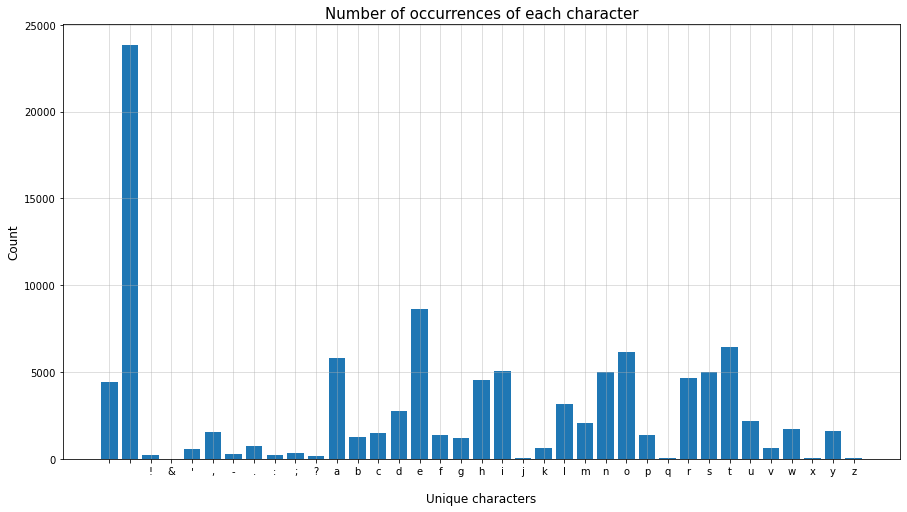

In [3]:
# occurrences of unique characters in the list
values, counts = np.unique(char_list, return_counts=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(values, counts, color='C0')
ax.grid(alpha=0.5)
ax.set_title('Number of occurrences of each character', fontsize=15)
ax.set_xlabel('Unique characters', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()


In [4]:
print('Unique characters: \n', values)
print('\nTotal number of characters: ', len(char_list))

Unique characters: 
 ['\n' ' ' '!' '&' "'" ',' '-' '.' ':' ';' '?' 'a' 'b' 'c' 'd' 'e' 'f' 'g'
 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y'
 'z']

Total number of characters:  106077


## Shannon Entropy
The Shannon entropy can be thought as the information associated to a given distribution. The Shannon entropy of a discrete random variable $X$ is defines as
$$
H(X) = \mathbb{E}[I(X)] = \mathbb{E}[-\log_{2}p(X)] = -\sum_{x\in X} p(x)\log_{2}p(x) 
$$

In our case, it is possible to estimate the probability distribution of each character as the ratio between its number of occurrences in the text and the total number of characters:
$$
p(c\in\text{text}) \approx \frac{\text{\# of occurrences of }c}{\text{tot \# of characters}}
$$


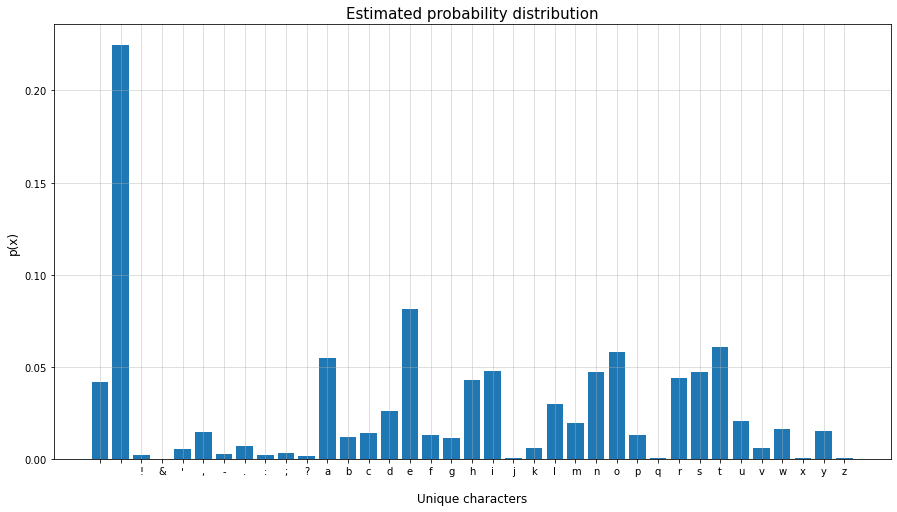

In [5]:
# probability distribution
prob = counts/len(char_list)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(values, prob, color='C0')
ax.grid(alpha=0.5)
ax.set_title('Estimated probability distribution', fontsize=15)
ax.set_xlabel('Unique characters', fontsize=12)
ax.set_ylabel('p(x)', fontsize=12)

plt.show()

In [6]:
# shannon entropy 
H = -np.dot(prob, np.log2(prob))

print('Estimated Shannon entropy: %.4f' %H)

Estimated Shannon entropy: 4.2260


## Mutual Information
We can apply the same idea in order to estimate the mutual information $I(X_n;X_{n+1})=H(X_n)+H(X_{n+1})-H(X_n,X_{n+1})$, where $X_n$ is one character and $X_{n+1}$ the next character.

In [7]:
char_couples = list(tuple(zip(char_list[:-1], char_list[1:])))

counter = dict(Counter(e for e in char_couples))

print('Some pairs: \n', list(counter.items())[0:10])
print('\nTotal number of pairs: ', len(counter.keys()))


Some pairs: 
 [(('a', 'c'), 134), (('c', 't'), 68), (('t', ' '), 1396), ((' ', '\n'), 9), (('\n', 's'), 136), (('s', 'c'), 58), (('c', 'e'), 262), (('e', 'n'), 562), (('n', 'e'), 371), (('e', ' '), 2292)]

Total number of pairs:  691


In [8]:
H_n = H
H_np1 = H 

# bivariate distribution
prob_couples = np.array(list(counter.values()))/sum(counter.values())
H_n_np1 = -np.dot(prob_couples, np.log2(prob_couples))

I_Xn_Xnp1 = H_n+H_np1-H_n_np1
print('Estimated mutual information: %.4f' %I_Xn_Xnp1)

Estimated mutual information: 0.8206
